## **Busara Projects Intern Task**


## **Project Overview: Enhancing Uptake of HIV Preventive Medicine in Kenya**

Busara has collaborated with an international organization called JHG (Journey for Health), focusing on sexual reproductive health, to address the challenge of low uptake and demand for HIV preventive medicine in Kenya. The medicine, referred to as DP (Daily Prophylaxis), is crucial for maintaining effective prevention against HIV. Despite its availability at no cost through clinics nationwide, the expected demand has not materialized.

The DP program is administered in partnership with numerous clinics throughout Kenya, each responsible for distributing monthly packages containing 30 pills. The program's objective is to encourage consistent use of the medicine for successful prevention. However, JHG is encountering unexpected hurdles in encouraging people to adopt the treatment regimen.

Recognizing that behavioral factors may underlie this issue, Busara has undertaken an investigation into the DP program's uptake. The dataset, labeled as DP_Continuation, offers insights into the continuity of DP usage among patients. By analyzing this data, Busara aims to identify patterns, barriers, and potential drivers affecting patients' willingness to consistently adhere to the prescribed regimen.

The findings from this project will provide valuable insights to JHG and other stakeholders, shedding light on behavioral dynamics that impact the adoption of preventive medicine. Ultimately, the collaboration between Busara and JHG seeks to improve public health outcomes by addressing challenges in HIV preventive medicine adherence, ultimately leading to a reduction in HIV transmission rates across Kenya.

## **Problem Statement**
The challenge is to boost adherence to free HIV preventive medicine (DP) in Kenya, provided by JHG organization across clinics. Despite accessibility, uptake remains low. This behavioral issue, hindering daily DP pill consumption, needs exploration. Analyzing the DP_Continuation dataset, the project aims to uncover behavioral barriers, patterns, and enablers that influence patients' adherence. Insights from the analysis will inform strategic interventions to enhance DP uptake, potentially leading to reduced HIV transmission rates and improved public health outcomes in Kenya.

## **Project Objectives**

1. **Analyze Behavioral Patterns:** Explore the DP_Continuation dataset to identify behavioral patterns, trends, and factors affecting patients' adherence to the prescribed regimen of DP (Daily Prophylaxis) pills.

2. **Identify Barriers and Drivers:** Identify barriers that hinder consistent DP pill consumption, while also recognizing factors that motivate and drive adherence among patients.
3. **Recommendation Development:** Develop evidence-based recommendations and strategies to address identified barriers, enhancing DP pill uptake and improving adherence rates among diverse patient populations.

4. **Impact Assessment:** Evaluate the potential impact of proposed interventions on DP program adherence, projecting potential improvements in HIV preventive measures and transmission rates across Kenya.

## **Success Metrics for Enhancing HIV Preventive Medicine Adherence in Kenya**

1. Adherence Rate Improvement: Measure the percentage increase in patients consistently adhering to the DP pill regimen over a defined period, comparing baseline adherence rates to post-intervention rates.

2. Demographic Segmentation: Analyze adherence improvement among different demographic segments (age, gender, location), aiming for balanced enhancement across diverse patient groups.

3. Monthly Clinic Visits: Monitor the frequency of patients' monthly clinic visits for DP pill collection. Target a notable increase in regular visits, reflecting improved adherence.

In [2]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the data
data = pd.read_csv('DP_continuation .csv')
data.head()

,clientsid,Gender,CountyOfBirth,Age,EntryPoint,ReferredOrTransferredFrom,InitialVisitDate,BP,Weight_,Height,SignOfSti,Lmp,Cluster,FacilityType,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
0,10269-07-1/18,M,Kisii,38,Referred,VCT Site,2018-03-14,113/82,68.0,172.0,No,1900-01-01,Nairobi,Public,1,1,1,1,1,0
1,10269-07-2/18,F,Meru,44,Referred,VCT Site,2018-04-11,120/84,102.0,168.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
2,10269-07-3/18,M,Kiambu,40,Referred,Outreach,2018-04-04,113/84,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
3,10269-07-4/18,M,Bungoma,24,Referred,VCT Site,2018-04-11,000/00,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,0,0,1
4,10269-07-5/18,F,Kiambu,31,Referred,VCT Site,2018-05-13,000/00,75.5,759.5,No,2018-04-01,Nairobi,Public,1,1,0,0,0,1


Having loaded the data we will mow proceed to describe the dataset so as to understand what is contained in the dataset.

In [6]:
# class to describe dataset

class Describer:

    # initialize object

    def __init__(self, df):
        self.df = df

    # method to check shape of data

    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out

    # method to check info on dataset

    def data_info(self):
        out = print(self.df.info(), '\n')
        return out

    # method to describe numerical columns

    def data_describe(self):
        out = self.df.describe()
        return out

    # method to check data types

    def data_type(self):

        print("Data has",len( data.select_dtypes(include='number').columns),
                "Numeric columns")

        print("and", len(data.select_dtypes(include='object').columns),
          "Categorical columns")

        print('*******************')
        print('*******************')

        print('Numerical Columns:', data.select_dtypes(include='number').columns)
        print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

        return None

    # check duplicates

    def check_duplicates(self):
        duplicates = []

        for i in data.duplicated():
            duplicates.append(i)
        duplicates_set = set(duplicates)
        if(len(duplicates_set) == 1):
            print('The Dataset has No Duplicates')

        else:
            duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
            print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')

        return None

    # method to check missing values

    def missing_values(self):


        if data.isnull().any().any() == False :

            print("There Are No Missing Values")

        else:

            missing_values = data.isnull().sum().sort_values(ascending=False)

            missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))

            missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})

            return missing_df[missing_df['Percentage %'] > 0]



In [14]:
# creating an instance of the class describer

describe_df = Describer(data)

# lets view the shape of the data

describe_df.shape()

# lets check for duplicates

describe_df.check_duplicates()

# lets describe data types

describe_df.data_type()

# lets view the info of the data

describe_df.data_info()

# lets describe numerical cols

describe_df.data_describe()

# lets get missing values

describe_df.missing_values()


The DataFrame has:
	* 22131 rows
	* 20 columns 

The Dataset has No Duplicates
Data has 9 Numeric columns
and 11 Categorical columns
*******************
*******************
Numerical Columns: Index(['Age', 'Weight_', 'Height', 'Received_DP', 'Refill1month',
       'Refill2months', 'Refill3months', 'Refill6months',
       'received_counseling'],
      dtype='object')
Categorical Coulumns: Index(['clientsid', 'Gender', 'CountyOfBirth', 'EntryPoint',
       'ReferredOrTransferredFrom', 'InitialVisitDate', 'BP', 'SignOfSti',
       'Lmp', 'Cluster', 'FacilityType'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   clientsid                  22131 non-null  object 
 1   Gender                     22131 non-null  object 
 2   CountyOfBirth              22131 non-null  object 
 3   Age            

,Missing Values,Percentage %
BP,307,0.013872
Height,117,0.005287
Weight_,117,0.005287
Lmp,117,0.005287
SignOfSti,117,0.005287


## **Data Understanding:**

The provided DataFrame contains a total of 22,131 rows and 20 columns, representing various attributes related to the HIV preventive medicine program. There are no duplicate records within the dataset. The DataFrame is composed of 9 numerical columns and 11 categorical columns.

The numerical columns include features such as 'Age', 'Weight_', 'Height', 'Received_DP', 'Refill1month', 'Refill2months', 'Refill3months', 'Refill6months', and 'received_counseling'. These columns capture quantitative data points.

On the other hand, the categorical columns encompass attributes like 'clientsid', 'Gender', 'CountyOfBirth', 'EntryPoint', 'ReferredOrTransferredFrom', 'InitialVisitDate', 'BP', 'SignOfSti', 'Lmp', 'Cluster', and 'FacilityType'. These columns hold categorical information, such as gender, geographic location, program entry point, medical indicators, and more.

The DataFrame's structure and content indicate a diverse dataset with a combination of both numerical and categorical attributes. The dataset does not exhibit any missing values in the provided non-null count information. The memory usage of the DataFrame is approximately 3.4+ MB. The data types for the columns range from integer (int64), float (float64), to object (string or categorical).

Overall, this preliminary data understanding helps provide insights into the nature of the dataset, facilitating further exploration, analysis, and potential insights extraction to address the challenges in HIV preventive medicine adherence.

## **Data Cleaning:**

The data set we have has some missing values as shown by the class function. Therefore we are going to drop the missing values since they consists of a small percentage of the data (ie <1%).

In [21]:
#dropin the missing data
data = data.dropna()
data.isna().sum()

clientsid                    0
Gender                       0
CountyOfBirth                0
Age                          0
EntryPoint                   0
ReferredOrTransferredFrom    0
InitialVisitDate             0
BP                           0
Weight_                      0
Height                       0
SignOfSti                    0
Lmp                          0
Cluster                      0
FacilityType                 0
Received_DP                  0
Refill1month                 0
Refill2months                0
Refill3months                0
Refill6months                0
received_counseling          0
dtype: int64

As part of pre processing we will create two new columns one to represent the age as an age group and the other to account for the total number of times that the patients revisit the medical facilities to obtain the drug. This will range from 1 which indicates the patient only received the DP without refilling and 5 which indicates that they refillled their DP 4 times.

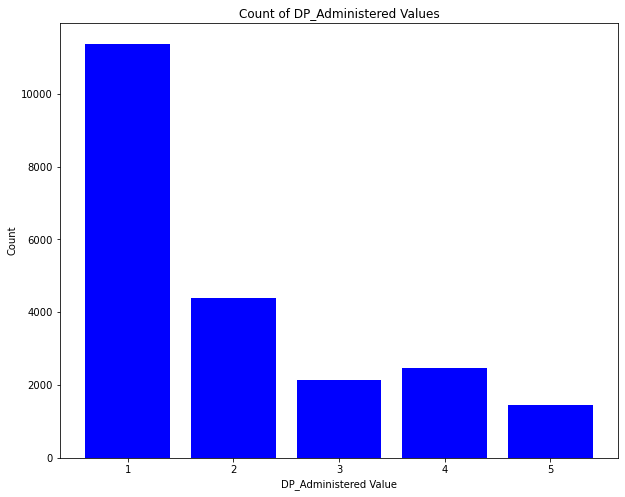

In [34]:
# Add values from multiple columns into a new column
columns_to_sum = ['Received_DP','Refill1month','Refill2months','Refill3months','Refill6months']
data['DP_Administered'] = data[columns_to_sum].sum(axis=1)

# Grouping values and getting the counts
grouped = data['DP_Administered'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(grouped.index, grouped.values, color='blue')

# Adding labels and title
plt.title('Count of DP_Administered Values')
plt.xlabel('DP_Administered Value')
plt.ylabel('Count')

# Display the chart
plt.show()

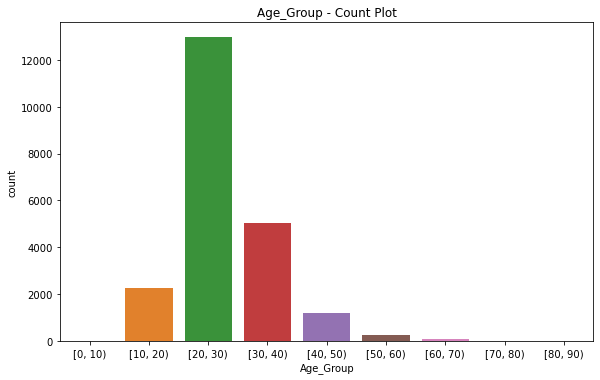

In [30]:
# Group 'Age' column into bins of 10
data['Age_Group'] = pd.cut(data['Age'], bins=range(0, 100, 10), right=False)

# Categorical column plots
categorical_columns = ['Age_Group']

# Bar plots for categorical columns
plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(f'{col} - Count Plot')

plt.tight_layout()
plt.show()

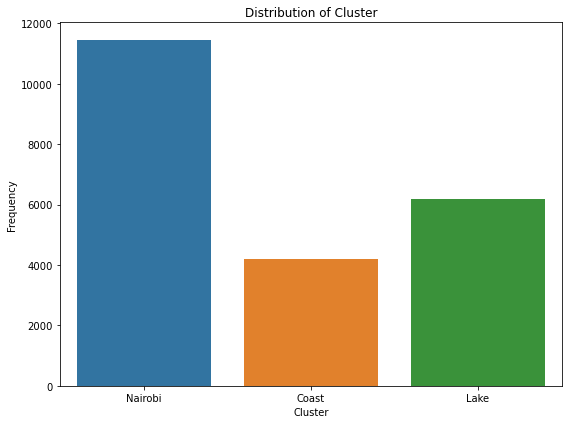

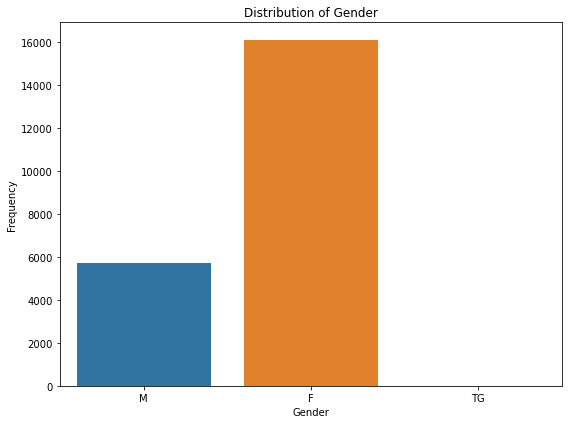

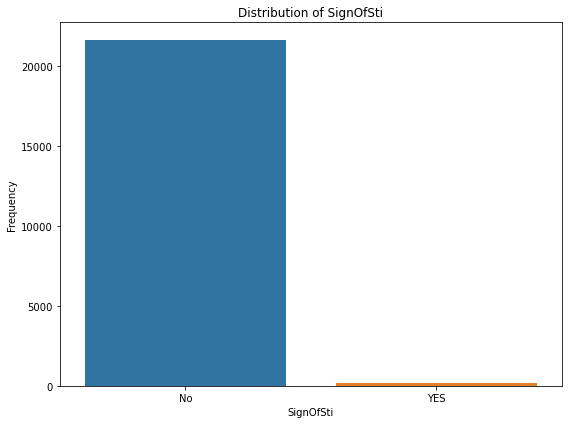

In [44]:
# List of columns for which you want to create Seaborn plots
columns_to_plot = ['Cluster', 'Gender','SignOfSti']

# Create Seaborn plots for each column
for col in columns_to_plot:
    plt.figure(figsize=(8, 6))
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        sns.histplot(data[col], bins=10)  # Example of a distribution plot
    else:
        sns.countplot(x=col, data=data)  # Example of a count plot
        
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

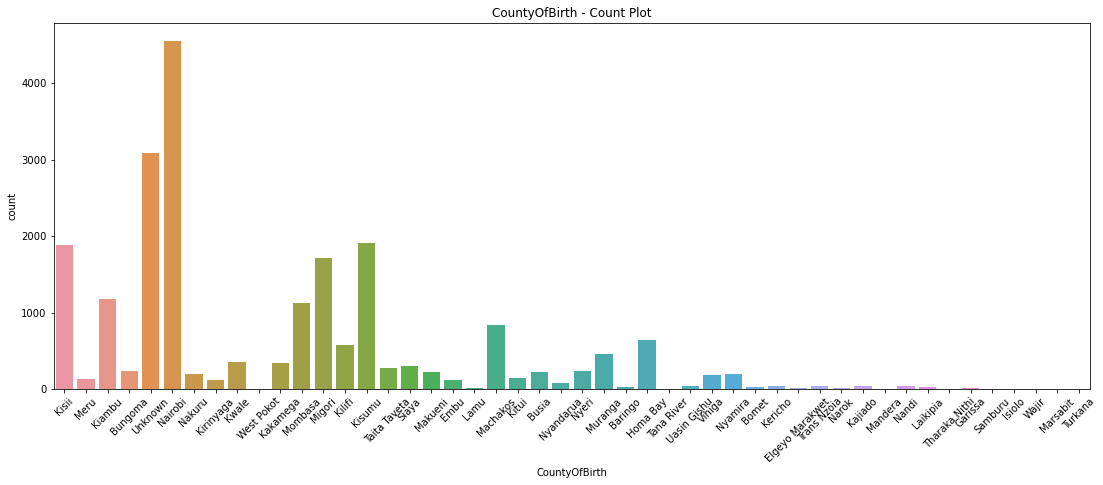

In [43]:
# Categorical column plots
categorical_columns = ['CountyOfBirth']

# Bar plots for categorical columns
plt.figure(figsize=(30, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(f'{col} - Count Plot')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

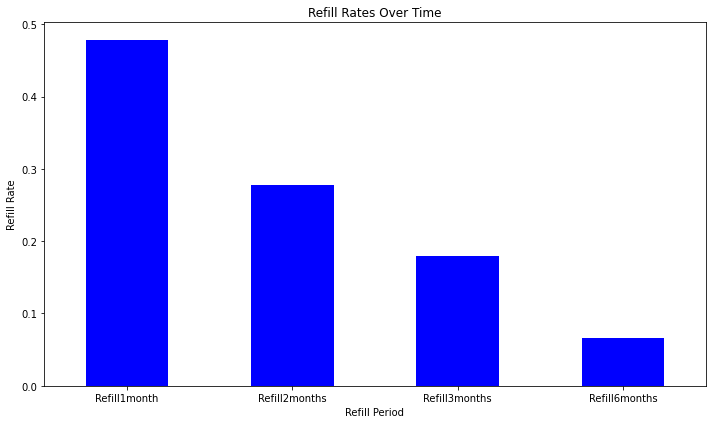

In [47]:
# Calculate refill rates for each refill variable
refill_columns = ['Refill1month', 'Refill2months', 'Refill3months', 'Refill6months']
refill_rates = data[refill_columns].sum() / data['Received_DP'].sum()

# Create a bar chart to visualize refill rates
plt.figure(figsize=(10, 6))
refill_rates.plot(kind='bar', color='blue')
plt.title('Refill Rates Over Time')
plt.xlabel('Refill Period')
plt.ylabel('Refill Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()